In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('..\\datos_1\\df_final.csv', index_col=0)
df.head()

,price,propertyType,size_stand,exterior,rooms,bathrooms,distance_stand,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3
0,750.0,699.269091,0.011443,698.540925,686.563495,696.262821,-0.714088,698.539185,697.861100,703.566472,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,750.0,699.269091,0.432212,698.540925,702.103021,696.262821,-0.040932,698.539185,678.729385,692.462029,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,590.0,699.269091,0.432212,698.540925,705.865661,692.154402,2.948728,698.539185,674.405722,692.462029,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,684.0,689.985829,-0.619710,698.540925,691.121165,696.262821,-0.446614,684.052227,674.405722,676.478267,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,600.0,699.269091,0.558443,698.540925,702.103021,696.262821,1.505006,698.539185,697.861100,692.462029,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [3]:
x= df.drop(columns='price')
y = df[['price']]

In [4]:
y.describe()

,price
count,348.00000
mean,695.91954
std,55.44579
min,500.00000
25%,664.50000
50%,710.00000
75%,745.50000
max,750.00000


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

# Cross Validation

In [6]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

## Decision Tree

In [7]:
params_arbol = {
    'max_depth': [4, 7,10,14],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 15, 20, 30],
    'max_leaf_nodes': [6, 8, 10, 20, 30]
}

In [8]:
params_arbol_4 = {
    'max_depth': [2,4,3],
    'min_samples_split': [50, 100, 110],
    'min_samples_leaf': [18,20,21],
    'max_leaf_nodes': [6,7, 8]
}

In [9]:
params_arbol_3 = {
    'max_depth': [7,10,14],
    'min_samples_split': [10, 30,40],
    'min_samples_leaf': [7, 10],
    'max_leaf_nodes': [7, 8, 9]
}

In [10]:
params_arbol_2 = {
    'max_depth': [5,4,3],
    'min_samples_split': [50, 100, 110],
    'min_samples_leaf': [18,20,21],
    'max_leaf_nodes': [4,5,6,]
}

In [11]:
params_arbol_5 = {
    'max_depth': [10,30,50],
    'min_samples_split': [100, 200, 500],
    'min_samples_leaf': [50,60,81],
    'max_leaf_nodes': [10,20,50]
}

## Params 1

In [12]:
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 7, 10, 14],
                         'max_leaf_nodes': [6, 8, 10, 20, 30],
                         'min_samples_leaf': [10, 15, 20, 30],
                         'min_samples_split': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [13]:
modelo_final_arbol = grid_search_arbol.best_estimator_

In [14]:
modelo_final_arbol

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=6, min_samples_leaf=20,
                      min_samples_split=100)

In [15]:
y_test_pred_final = modelo_final_arbol.predict(x_test)
y_train_pred_final = modelo_final_arbol.predict(x_train)

In [16]:
df_metricas_arbol = metricas(y_train, y_train_pred_final, y_test, y_test_pred_final)

In [17]:
df_metricas_arbol

,r2_score,MAE,MSE,RMSE
train,0.265859,37.365710,2287.304859,47.825776
test,0.092692,38.924217,2675.451827,51.724770


# Params 3

In [18]:
grid_search_arbol_3 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_3,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 14], 'max_leaf_nodes': [7, 8, 9],
                         'min_samples_leaf': [7, 10],
                         'min_samples_split': [10, 30, 40]},
             scoring='neg_mean_squared_error')

In [19]:
modelo_final_arbol_3 = grid_search_arbol_3.best_estimator_

In [20]:
y_test_pred_final_3 = modelo_final_arbol_3.predict(x_test)
y_train_pred_final_3 = modelo_final_arbol_3.predict(x_train)

In [21]:
df_metricas_arbol_3 = metricas(y_train, y_train_pred_final_3, y_test, y_test_pred_final_3)

In [22]:
df_metricas_arbol_3

,r2_score,MAE,MSE,RMSE
train,0.374259,33.751841,1949.570927,44.153946
test,0.018885,39.390274,2893.092402,53.787474


## PARAMS 2

In [23]:
grid_search_arbol_2 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_2,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 4, 3], 'max_leaf_nodes': [4, 5, 6],
                         'min_samples_leaf': [18, 20, 21],
                         'min_samples_split': [50, 100, 110]},
             scoring='neg_mean_squared_error')

In [24]:
modelo_final_arbol_2 = grid_search_arbol_2.best_estimator_

In [25]:
modelo_final_arbol_2

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=4, min_samples_leaf=18,
                      min_samples_split=110)

In [26]:
y_test_pred_final_2 = modelo_final_arbol_2.predict(x_test)
y_train_pred_final_2 = modelo_final_arbol_2.predict(x_train)

In [27]:
df_metricas_arbol_2 = metricas(y_train, y_train_pred_final_2, y_test, y_test_pred_final_2)

In [28]:
df_metricas_arbol_2

,r2_score,MAE,MSE,RMSE
train,0.258080,37.546390,2311.542853,48.078507
test,0.072232,39.363497,2735.784103,52.304724


# Params 5

In [29]:
grid_search_arbol_5 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_5,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_5.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 30, 50],
                         'max_leaf_nodes': [10, 20, 50],
                         'min_samples_leaf': [50, 60, 81],
                         'min_samples_split': [100, 200, 500]},
             scoring='neg_mean_squared_error')

In [30]:
modelo_final_arbol_5 = grid_search_arbol_5.best_estimator_

In [31]:
modelo_final_arbol_5

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=10, min_samples_leaf=81,
                      min_samples_split=100)

In [32]:
y_test_pred_final_5 = modelo_final_arbol_5.predict(x_test)
y_train_pred_final_5 = modelo_final_arbol_5.predict(x_train)

In [33]:
df_metricas_arbol_5 = metricas(y_train, y_train_pred_final_5, y_test, y_test_pred_final_5)

In [34]:
df_metricas_arbol_5

,r2_score,MAE,MSE,RMSE
train,0.082462,42.423101,2858.699143,53.466804
test,0.039237,41.348724,2833.078501,53.226671


## Opciones de visualización para mejorar

In [35]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
170,0.004516,0.000454,0.003181,0.000381,10,6,20,100,"{'max_depth': 10, 'max_leaf_nodes': 6, 'min_sa...",-3941.003161,-2252.173066,-1724.857188,-2485.496142,-2460.364898,-2572.778891,736.756696,1
282,0.003805,0.000243,0.003524,0.000712,14,10,20,100,"{'max_depth': 14, 'max_leaf_nodes': 10, 'min_s...",-3941.003161,-2252.173066,-1724.857188,-2485.496142,-2460.364898,-2572.778891,736.756696,1
138,0.004024,0.000459,0.003212,0.000246,7,20,20,100,"{'max_depth': 7, 'max_leaf_nodes': 20, 'min_sa...",-3941.003161,-2252.173066,-1724.857188,-2485.496142,-2460.364898,-2572.778891,736.756696,1
58,0.005478,0.002291,0.004428,0.000978,4,20,20,100,"{'max_depth': 4, 'max_leaf_nodes': 20, 'min_sa...",-3941.003161,-2252.173066,-1724.857188,-2485.496142,-2460.364898,-2572.778891,736.756696,1
154,0.004319,0.000821,0.003111,0.000209,7,30,20,100,"{'max_depth': 7, 'max_leaf_nodes': 30, 'min_sa...",-3941.003161,-2252.173066,-1724.857188,-2485.496142,-2460.364898,-2572.778891,736.756696,1
90,0.006449,0.001575,0.004733,0.001037,7,6,20,100,"{'max_depth': 7, 'max_leaf_nodes': 6, 'min_sam...",-3941.003161,-2252.173066,-1724.857188,-2485.496142,-2460.364898,-2572.778891,736.756696,1
74,0.007439,0.003284,0.003527,0.001337,4,30,20,100,"{'max_depth': 4, 'max_leaf_nodes': 30, 'min_sa...",-3941.003161,-2252.173066,-1724.857188,-2485.496142,-2460.364898,-2572.778891,736.756696,1
106,0.004759,0.000895,0.003915,0.001109,7,8,20,100,"{'max_depth': 7, 'max_leaf_nodes': 8, 'min_sam...",-3941.003161,-2252.173066,-1724.857188,-2485.496142,-2460.364898,-2572.778891,736.756696,1
314,0.004414,0.000667,0.003214,0.000253,14,30,20,100,"{'max_depth': 14, 'max_leaf_nodes': 30, 'min_s...",-3941.003161,-2252.173066,-1724.857188,-2485.496142,-2460.364898,-2572.778891,736.756696,1
26,0.004039,0.000711,0.003313,0.000878,4,8,20,100,"{'max_depth': 4, 'max_leaf_nodes': 8, 'min_sam...",-3941.003161,-2252.173066,-1724.857188,-2485.496142,-2460.364898,-2572.778891,736.756696,1


In [36]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
170,10,6,20,100,-2572.778891
282,14,10,20,100,-2572.778891
138,7,20,20,100,-2572.778891
58,4,20,20,100,-2572.778891
154,7,30,20,100,-2572.778891
...,...,...,...,...,...
139,7,20,20,200,-3140.532809
135,7,20,15,200,-3140.532809
131,7,20,10,200,-3140.532809
255,14,6,30,200,-3140.532809


In [37]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [38]:
df_rmse_prof

,param_max_depth,MSE
0,4,52.994075
1,7,53.054488
2,10,53.052372
3,14,53.052372


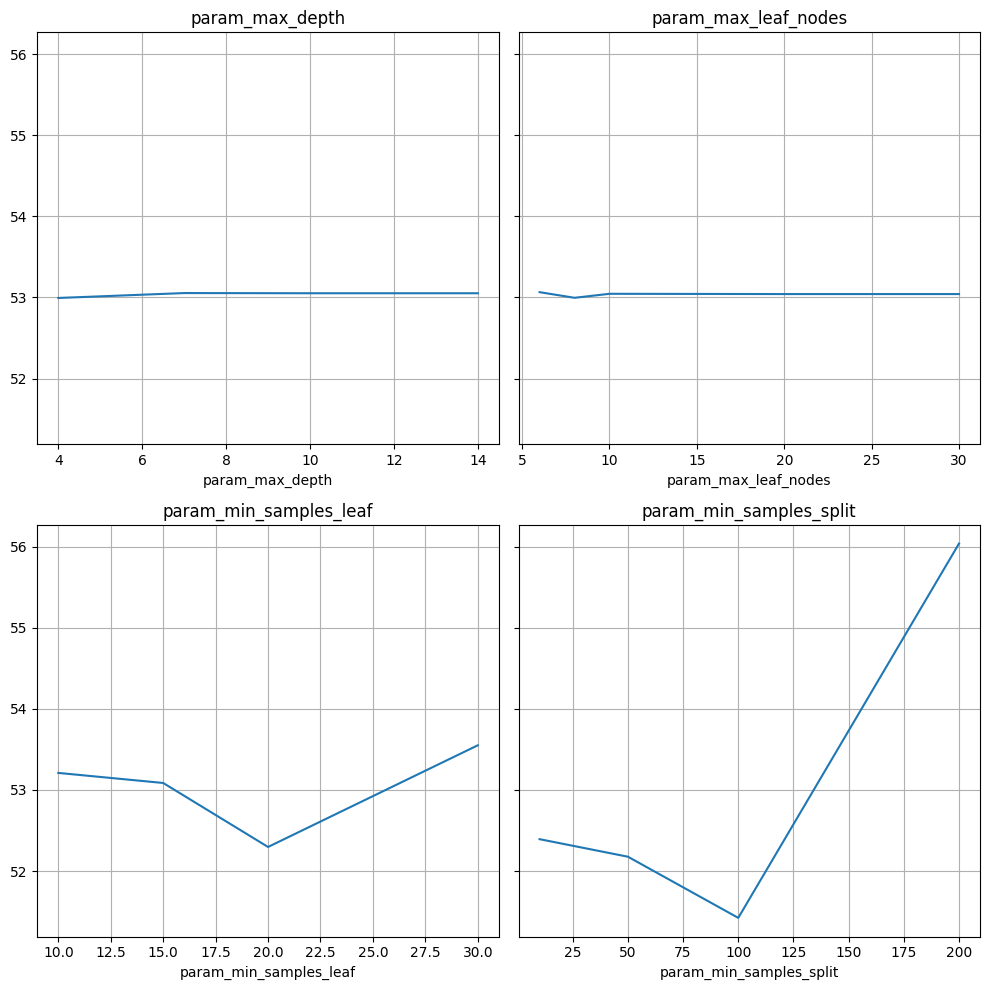

In [39]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 

In [40]:
df_importancia = pd.DataFrame(modelo_final_arbol.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

<Axes: xlabel='Importancia', ylabel='None'>

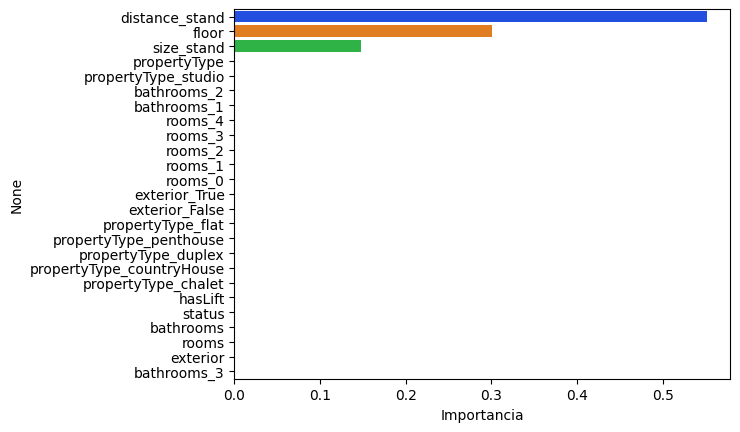

In [41]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

# Random Forest

In [42]:
params_rf = {
    'n_estimators': [70,100,120],
    'max_features': [3,5,7,10],
    'max_depth': [3,5,7,9],
    'min_samples_split': [100],
    'min_samples_leaf': [20], 
    'max_leaf_nodes': [5]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              )

grid_search_rf.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [43]:
modelo_final_rf

RandomForestRegressor(max_depth=3, max_features=10, max_leaf_nodes=5,
                      min_samples_leaf=20, min_samples_split=100,
                      n_estimators=70, random_state=42)

In [44]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.169726,40.562061,2586.819958,50.860790
test,0.126439,38.974128,2575.939756,50.753717


# Gradient Booster

In [45]:
# Definimos un espacio de parámetros para optimizar
params_gb = {
    'n_estimators': [70],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3],
    'min_samples_split': [100],
    'min_samples_leaf': [20], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [46]:
modelo_final_gb

GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=20,
                          min_samples_split=100, n_estimators=70,
                          random_state=42)

In [47]:
y_pred_test_gb = modelo_final_gb.predict(x_test)
y_pred_train_gb = modelo_final_gb.predict(x_train)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb

,r2_score,MAE,MSE,RMSE
train,0.558048,29.276944,1376.954880,37.107343
test,0.281374,35.084515,2119.069997,46.033357


# XGB

In [48]:
from xgboost import XGBRegressor

In [49]:
params_xgb = {
    'n_estimators': [70],
    'learning_rate': [0.01, 0.05,0.1],
    'max_depth': [3],
    'min_child_weight': [6,7],
    'subsample': [0.8], 
    'colsample_bytree': [0.25]
}

modelo_xgb = XGBRegressor(random_state=42) # por este método nos pide un array

grid_search_xgb = GridSearchCV(modelo_xgb,
                              params_xgb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_xgb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_xgb = grid_search_xgb.best_estimator_

In [50]:
modelo_final_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.25, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [51]:
y_pred_test_xgb = modelo_final_xgb.predict(x_test)
y_pred_train_xgb = modelo_final_xgb.predict(x_train)
df_metricas_xgb = metricas(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)
df_metricas_xgb

,r2_score,MAE,MSE,RMSE
train,0.480208,31.705418,1619.475026,40.242702
test,0.286698,34.859827,2103.370884,45.862522
